# Telecom Churn Case Study
    Nikhil N Barigidad
<hr style="border:0.2px solid gray"> </hr>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

>  *To reduce customer churn, telecom companies need to* **predict which customers are at high risk of churn**. 

Dataset for the case study can be downloaded from [this link](https://drive.google.com/file/d/1SWnADIda31mVFevFcfkGtcgBHTKKI94J/view)


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import missingno as misno

In [2]:
# Importing and reading data
churn_data = pd.read_csv('telecom_churn_data.csv')
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
churn_data.shape

(99999, 226)

### Target Creation
* Since Data labels are unknowns we will use historical data to create label
* Data available for september will be used for label creation
* Total usage = 0, Then the custoner might have churned thus setting target to 1
* Total usage > 1, Then the customer has used the services thus customer have not churned, setting target to 0

In [4]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [5]:
#Getting all september columns
cols_sep = []
for column in churn_data.columns:
    if(column.endswith('_9')):
        cols_sep.append(column)
cols_sep

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [6]:
# Columns used to set taget column
tagCols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [7]:
# Getting total usage in september month
churn_data['total_usage_sep'] = churn_data[tagCols].sum(axis=1)

In [8]:
# Setting target variable
churn_data.loc[churn_data['total_usage_sep'] == 0, 'target'] = 1
churn_data.loc[churn_data['total_usage_sep'] > 0, 'target'] = 0

In [9]:
# Dropping mobile number column
churn_data.drop(['mobile_number'], axis=1, inplace=True)

# Dropping all september columns
churn_data.drop(cols_sep, axis='columns', inplace=True)

# Dropping 'sep_vbc_3g' column
churn_data.drop(['sep_vbc_3g'], axis='columns', inplace=True)

#Also drop 'total_usage_sep'
churn_data.drop('total_usage_sep', axis='columns', inplace=True)

In [10]:
churn_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,target
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1.0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,NaN,7/25/2014,8/10/2014,NaN,1.0,2.0,NaN,

In [11]:
# Converting target variable to categorical 
churn_data['target'] = churn_data['target'].astype('category')

0.0    89.808898
1.0    10.191102
Name: target, dtype: float64


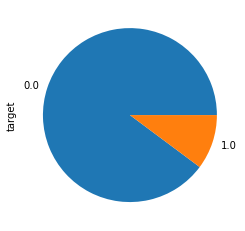

In [12]:
# Checking class imbalance
print((churn_data['target'].value_counts()/len(churn_data))*100)
((churn_data['target'].value_counts()/len(churn_data))*100).plot(kind="pie")
plt.show()

#### 89.8 % of the customers do not churn and only 10.2% of the customers are churned, Hence there seems to be a class imbalance

### Missing value treatment

In [13]:
# Function to retun the columns with more than missingCutoff% missing values.

def getMissingValues(missingCutoff):
    missing = round(100*(churn_data.isnull().sum()/churn_data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

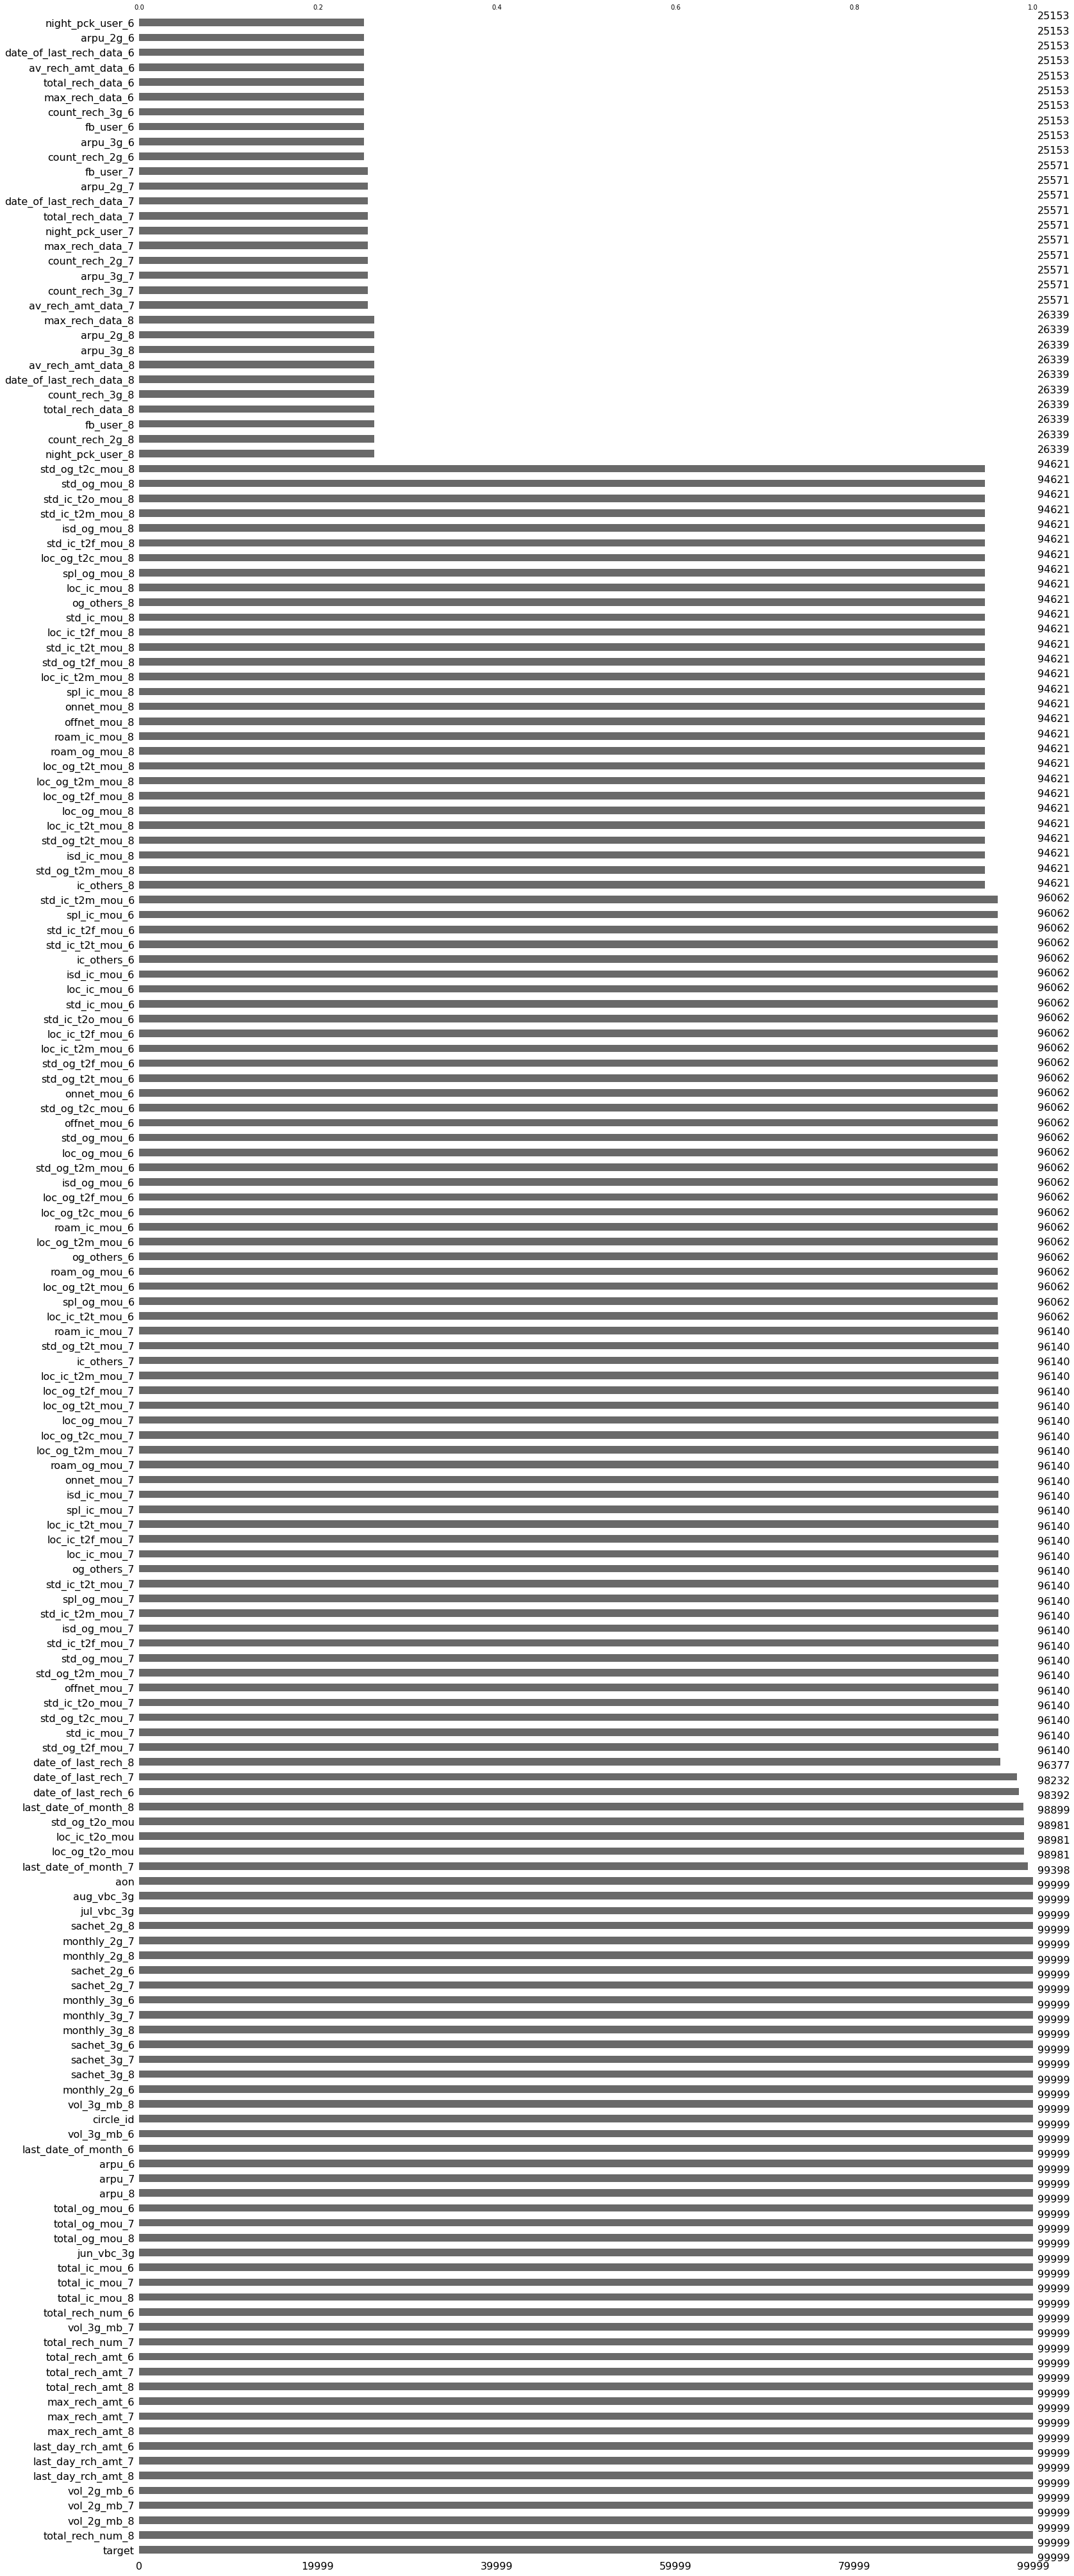

In [14]:
misno.bar(churn_data, sort='descending')
plt.show()

In [15]:
all_columns=churn_data.columns
date_columns=[x for x in all_columns if 'date' in x]
numeric_columns=[x for x in all_columns if x not in date_columns]

In [16]:
# percent of null values in date columns

churn_data[date_columns].isnull().sum()/len(churn_data)*100

last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
dtype: float64

In [17]:
from datetime import date,datetime
# Imputing default value for the following columns

churn_data['last_date_of_month_7']=churn_data['last_date_of_month_7'].fillna('7/31/2014')
churn_data['last_date_of_month_8']=churn_data['last_date_of_month_8'].fillna('8/31/2014')
churn_data['last_date_of_month_7'] = pd.to_datetime(churn_data['last_date_of_month_7'])
churn_data['last_date_of_month_8'] = pd.to_datetime(churn_data['last_date_of_month_8'])

In [18]:
# Imputing 0 in following columns as null values here means no reacherge was done.

churn_data['date_of_last_rech_6']=churn_data['date_of_last_rech_6'].fillna('6/1/2014')
churn_data['date_of_last_rech_7'].fillna(0, inplace=True)
churn_data['date_of_last_rech_8'].fillna(0, inplace=True)
churn_data['date_of_last_rech_data_6'].fillna(0, inplace=True)
churn_data['date_of_last_rech_data_7'].fillna(0, inplace=True)
churn_data['date_of_last_rech_data_8'].fillna(0, inplace=True)

In [19]:
# Checking na values in date columns 
churn_data[date_columns].isnull().sum()/len(churn_data)*100

last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
dtype: float64

In [20]:
# Droping columns which have single value.

unique_1_col=[]
for i in numeric_columns:
    if churn_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

churn_data.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [21]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 108 features having more than 0% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_mou_6           4.0
s

Out the these 108 features, many are required and are essential for analysis. The missing values for these features seems to suggest that these customers did not have added any value at that month. We can choose to impute these values with 0 as we can't take mean or median here, to make enable these features to give value to analysis.

In [22]:
missingcol = list(getMissingValues(0).index)
churn_data[missingcol]=churn_data[missingcol].fillna(0)

There are 108 features having more than 0% missing values/entries


In [23]:
getMissingValues(0)

There are 0 features having more than 0% missing values/entries


Series([], dtype: float64)

In [24]:
churn_data.shape

(99999, 161)

In [25]:
churn_data.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,target
0,6/30/2014,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1.0
1,6/30/2014,2014-07-31,2014-08-31,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,0,7/25/2014,8/10/2014,0.0,1.0,2.0,0.0,154.0,25.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0.0,0.0,0,1,0,0,0,2,0,0,0,0,0,0,0.0,1.0,1.0,1006,0.0,0.0,0.00,0.0
2,6

### High value customer

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In [26]:
# let's add new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
churn_data['total_data_rech_amt_6'] = churn_data['total_rech_data_6'] * churn_data['av_rech_amt_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['total_rech_data_7'] * churn_data['av_rech_amt_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['total_rech_data_8'] * churn_data['av_rech_amt_data_8']

We need to predict churn only for the high-value customers.
High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount of the 3 months.

In [27]:
# Computing the average recharge amount for the month 6 & 7 & 8. 
# This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amount = churn_data[['total_data_rech_amt_6','total_data_rech_amt_7',
                                  'total_data_rech_amt_8','total_rech_amt_6','total_rech_amt_7',
                                  'total_rech_amt_8']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount, 70)

print("70th percentile of the average recharge amount in the 3 months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the 3 months is -  241.83333333333334


In [28]:
# Filtering the high values

churn_data_HV = churn_data[avg_recharge_amount >= amount_70th_percentile]

In [29]:
# Reset the dataframe indexes

churn_data_HV = churn_data_HV.reset_index(drop=True)
churn_data_HV.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,target,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,6/30/2014,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1.0,252.0,252.0,252.0
1,6/30/2014,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [30]:
churn_data_HV.shape

(30009, 164)

### Handling Date columns

Conversion of date columns into integer values for model to interpret better

In [31]:
# Dropping last date of the month columns since it seems like they won't be contributing to the further analysis
churn_data_HV.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [32]:
churn_data_HV.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,target,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1.0,252.0,252.0,252.0
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.7

In [33]:
# Converting data type of data columns from object to datetime
cols = list(churn_data_HV.select_dtypes(include='object').columns)
churn_data_HV[cols] = churn_data_HV[cols].apply(pd.to_datetime)

In [34]:
# getting date of last recharge done  by customer in 3 months of time
churn_data_HV['date_last_rech'] = churn_data_HV['date_of_last_rech_8']

churn_data_HV.loc[churn_data_HV['date_last_rech'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech'] = churn_data_HV['date_of_last_rech_7']

churn_data_HV.loc[churn_data_HV['date_last_rech'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech'] = churn_data_HV['date_of_last_rech_6']

In [35]:
# Calculating number of days since last recharge
import datetime
churn_data_HV['days_since_last_rech'] = (pd.to_datetime(datetime.date(2014, 9, 1)) - 
                                         pd.to_datetime(churn_data_HV['date_last_rech'])).dt.days

In [36]:
# Getting date of last data recharge done  by customer in 3 months of time
churn_data_HV['date_last_rech_data'] = churn_data_HV['date_of_last_rech_data_8']

churn_data_HV.loc[churn_data_HV['date_last_rech_data'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech_data'] = churn_data_HV['date_of_last_rech_data_7']

churn_data_HV.loc[churn_data_HV['date_last_rech_data'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech_data'] = churn_data_HV['date_of_last_rech_data_6']

In [37]:
# Calculating number of days since last data recharge
churn_data_HV['days_since_last_rech_data'] = (pd.to_datetime(datetime.date(2014, 9, 1)) - 
                                         pd.to_datetime(churn_data_HV['date_last_rech_data'])).dt.days

In [38]:
# Dropping all date columns
cols = list(churn_data_HV.select_dtypes(include='datetime64[ns]').columns)
churn_data_HV.drop(cols, axis=1, inplace=True)

In [39]:
churn_data_HV.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,target,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,days_since_last_rech,days_since_last_rech_data
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1.0,252.0,252.0,252.0,24,24
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1.0,0.0,0.0,0.0,6,16314
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.

* As we can see in days_since_last_rech_data there are some outliers like 16314, So to avoid such data in the dataframe, We will check the earliest recgarge done between the normal recharge and the data recharge and update the column with smallest value among the two columns(`days_since_last_rech` and `days_since_last_rech_data`)

In [40]:
# Getting days since last reacharged whether it be data recharge or normal recharge
churn_data_HV['days_since_last_rech'] = np.round(np.minimum(churn_data_HV['days_since_last_rech'], 
                                                            churn_data_HV['days_since_last_rech_data']),2) 

In [41]:
# Dropping days_since_last_rech_data as it also captured in days_since_last_rech
churn_data_HV.drop(['days_since_last_rech_data'], axis=1, inplace=True)

In [42]:
# Check if values are well within the range
churn_data_HV['days_since_last_rech'].unique()

array([24,  6,  2,  1,  8,  4,  9, 30,  5, 11,  3,  7, 15, 10, 13, 56, 33,
       23, 31, 42, 48, 39, 12, 17, 22, 16, 20, 25, 21, 19, 14, 18, 36, 27,
       38, 29, 35, 53, 57, 79, 32, 77, 40, 47, 72, 46, 26, 45, 41, 54, 34,
       28, 63, 69, 37, 55, 51, 67, 49, 61, 50, 66, 43, 73, 70, 64, 52, 44,
       59, 62, 74, 81, 86, 65, 68, 78])

* `days_since_last_rech` is overall count of days since the last recharge of any type was done
* `days_since_last_rech` is the column comprising with the information of all recharge date columns of 6,7,8 months

### EDA

In [43]:
churn_data_HV.describe(percentiles=[0.05,0.25,0.50,0.75,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,days_since_last_rech
count,30009.000000,30009.000000,30009.000000,30009.00000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.00000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,300

* Looking at the data description, all the data columns except mobile_number, seems like there are outliers present

In [44]:
def distplotGrouped(col1, col2, col3):
    plt.figure(figsize=(24, 16))
    j = 6
    for i in range(3):
        plt.subplot(3,3,1+3*i)
        sns.distplot(churn_data_HV[col1+str(j)])
        plt.subplot(3,3,2+3*i)
        sns.distplot(churn_data_HV[col2+str(j)])
        if(len(col3) != 0):
            plt.subplot(3,3,3+3*i)
            sns.distplot(churn_data_HV[col3+str(j)])
        j += 1
    

In [45]:
def boxplotGrouped(col1, col2):
    plt.figure(figsize=(24, 16))
    j = 6
    for i in range(3):
        plt.subplot(3,3,1+3*i)
        sns.boxplot(churn_data_HV[col1+str(j)], churn_data_HV['target'])
        plt.subplot(3,3,2+3*i)
        sns.boxplot(churn_data_HV[col2+str(j)], churn_data_HV['target'])
        j += 1

#### Univariate Analysis

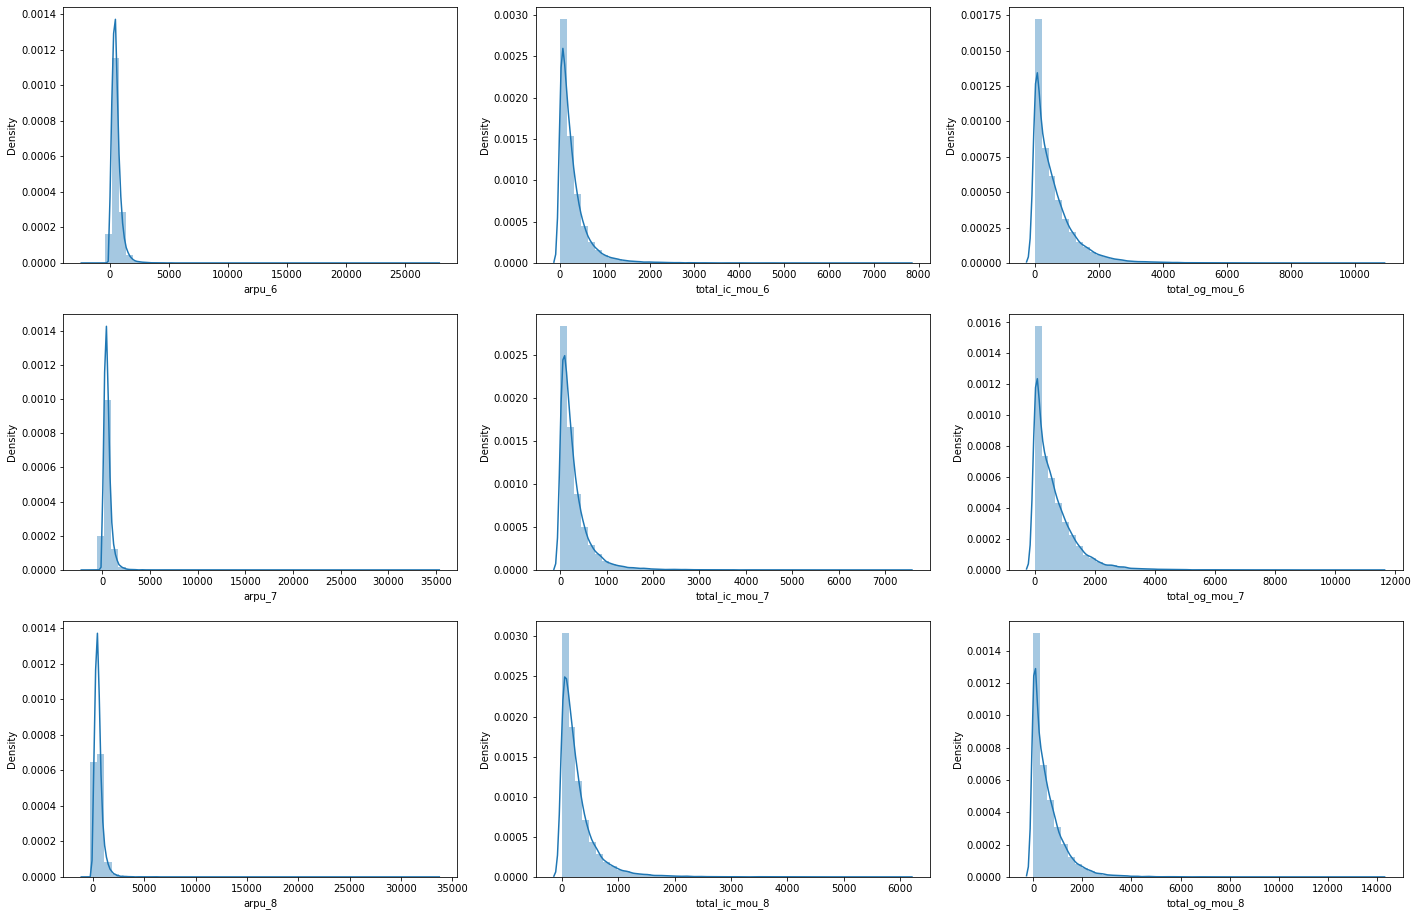

In [46]:
# Distribution of columns arpu_, total_ic_mou_ and total_og_mou_
distplotGrouped("arpu_", "total_ic_mou_", "total_og_mou_")

* Density of arpu is decreasing over the months
* Distribution of total_ic_mou over the months is similar

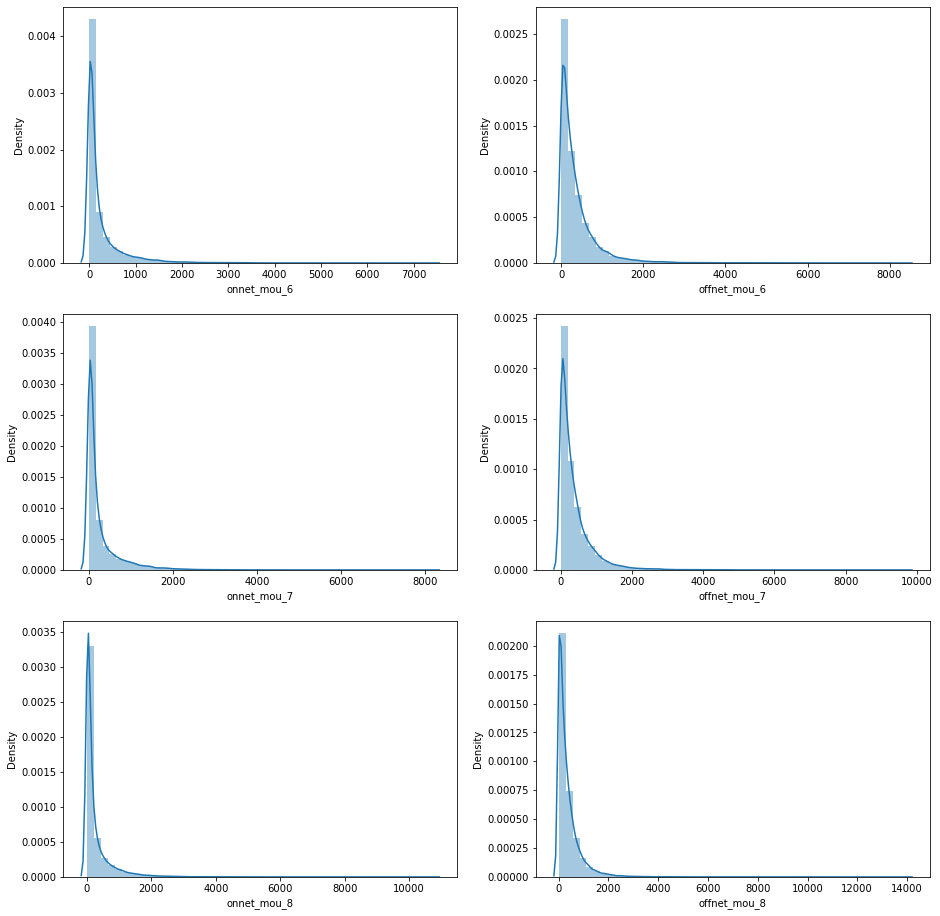

In [47]:
# Distribution of columns onnet_mou_, offnet_mou_
distplotGrouped('onnet_mou_', 'offnet_mou_', '')

* Distribution onnet and offnet is similar over the months

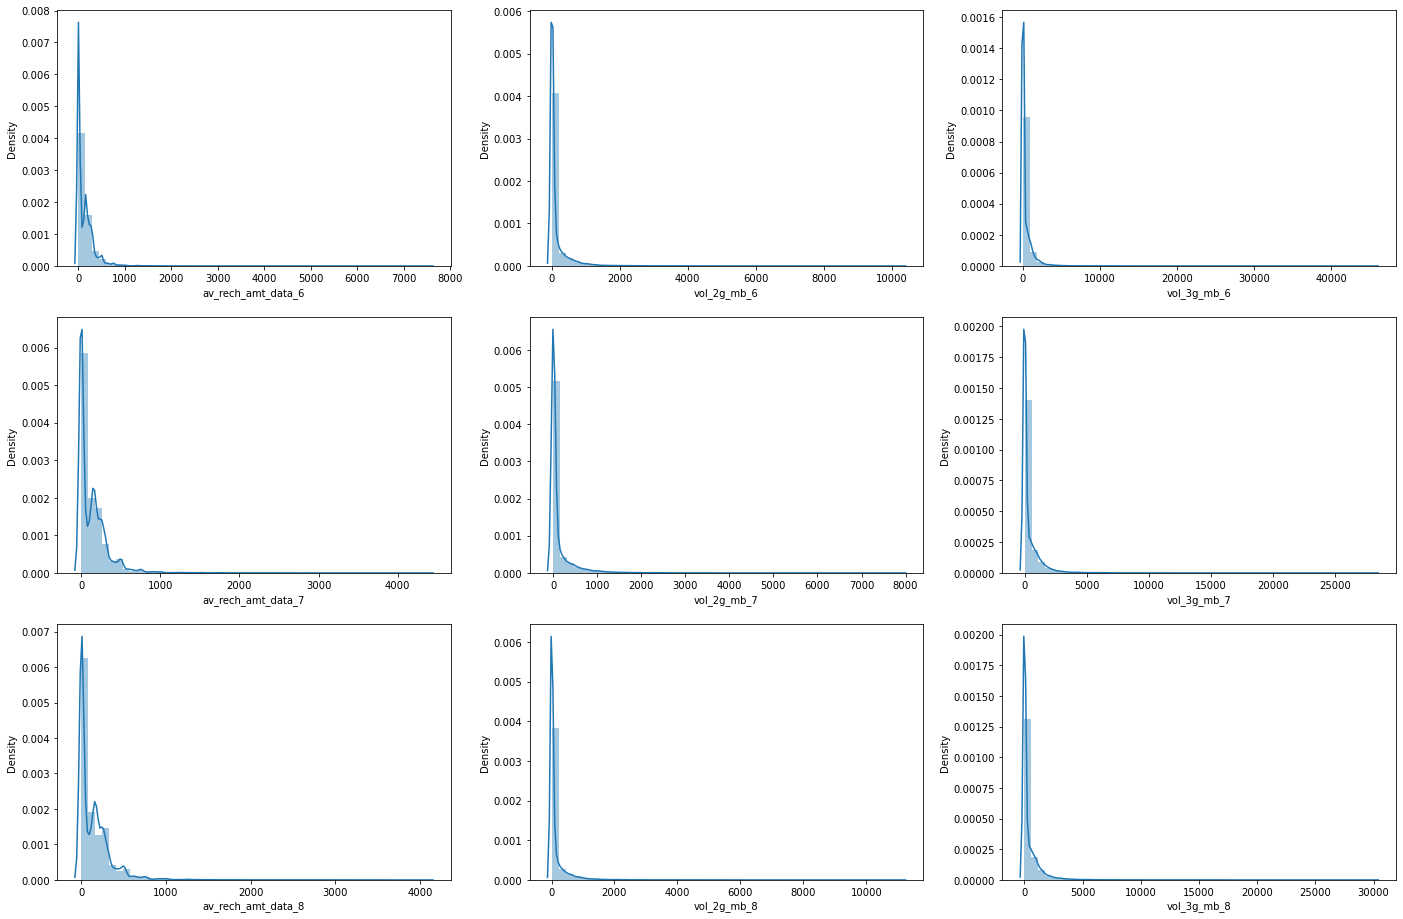

In [48]:
# Distribution plots for columns 'av_rech_amt_data_', 'vol_2g_mb_', 'vol_3g_mb_'
distplotGrouped('av_rech_amt_data_', 'vol_2g_mb_', 'vol_3g_mb_')

* `av_rech_amt_data` has slightly more spread over the months
* `vol_2g_mb` is however increased from June to July but is almost similar to July in August, And same pattern is followed in `vol_3g_mb`

#### Bivariate Analysis 

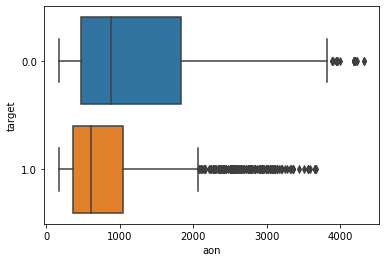

In [49]:
# Box plot to visualise aon with target
sns.boxplot(churn_data_HV['aon'], churn_data_HV['target'])
plt.show()

* `aon` variable is more spread for target value of 0
* `aon` variable has plenty of outliers for target value 1

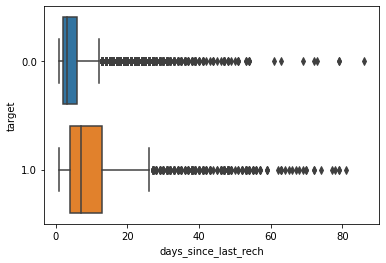

In [50]:
# Box plot to visualise days_since_last_rech with target
sns.boxplot(churn_data_HV['days_since_last_rech'], churn_data_HV['target'])
plt.show()

* The spread of `days_since_last_rech` is higher for target = 1 which is correct, because customer who have churned might not have recharged for a while
* Outlers are there for both the hues

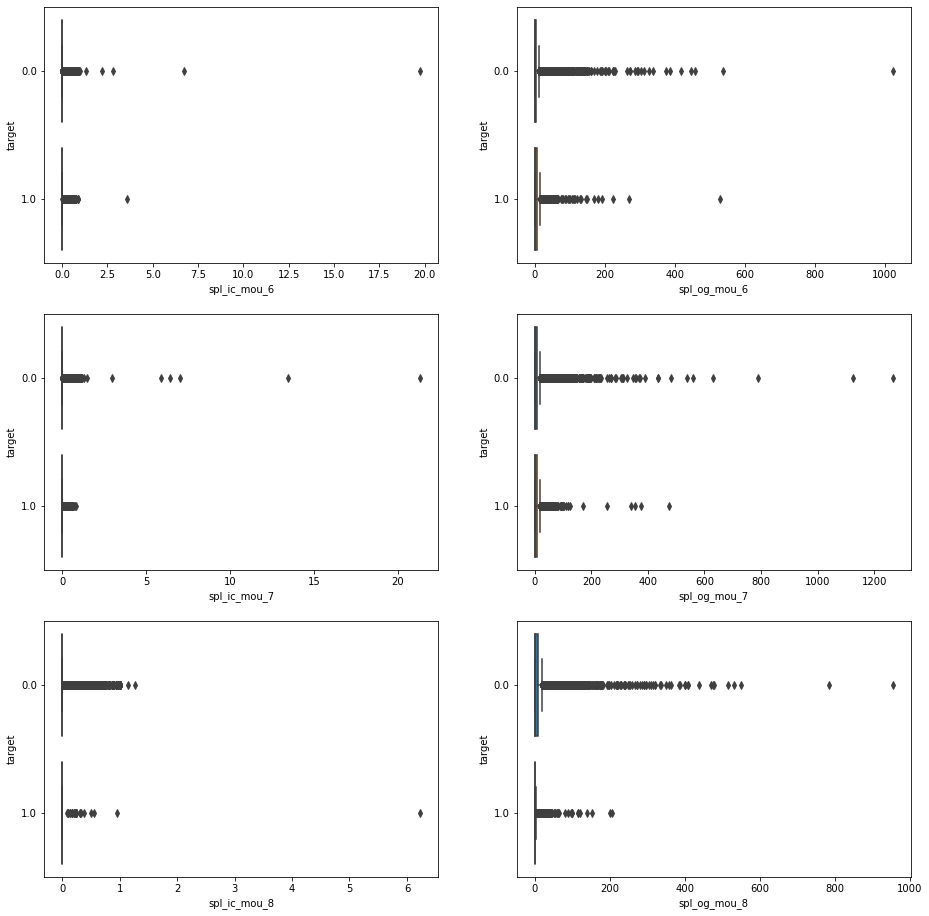

In [51]:
# Box plot to visualise spl_ic_mou_, spl_og_mou_ with target
boxplotGrouped('spl_ic_mou_', 'spl_og_mou_')

* From the box plots above we can easily say that the `spl_og_mou` for all three months have higher spread then that of `spl_ic_mou`
* Outliers are much higher in case of `spl_og_mou`

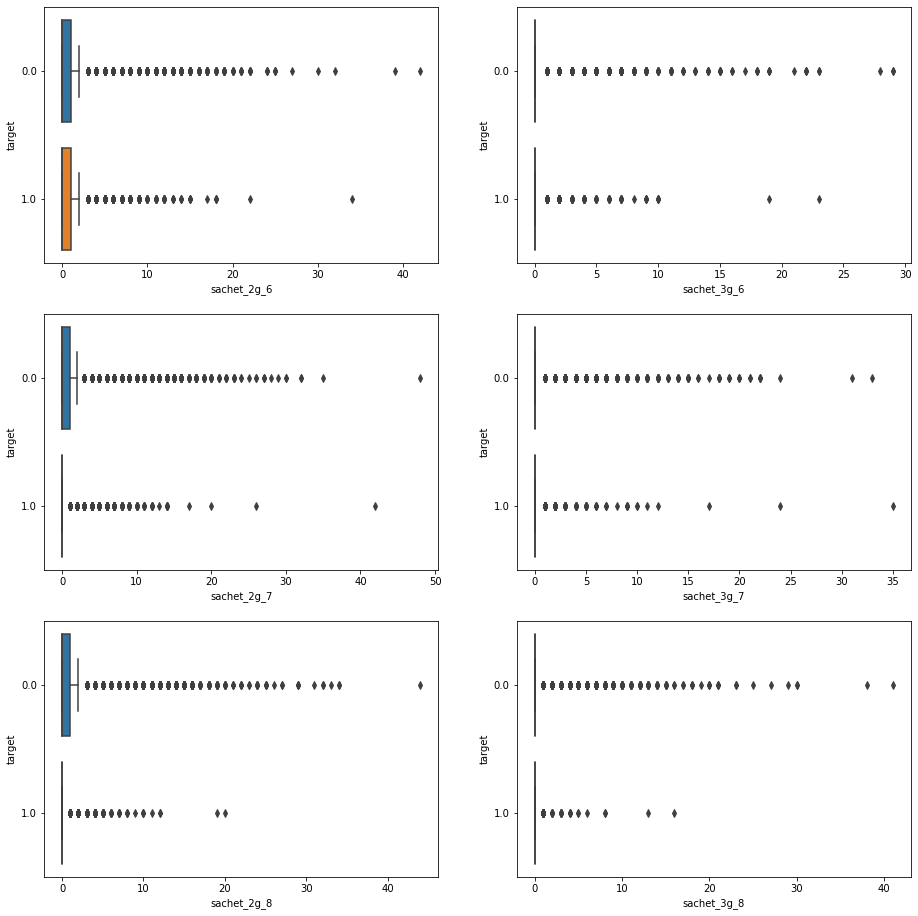

In [52]:
# Box plot to visualise sachet_2g_, sachet_3g_ with target
boxplotGrouped('sachet_2g_', 'sachet_3g_')

* From all the Box plots and churn data description we can see that there are large number of outliers present in the data

#### Outlier Treatement

In [53]:
# Capping outliers withing 0.05 and 0.95 values

def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

churn_data_HV_capped = cap_data(churn_data_HV)
churn_data_HV_capped.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,days_since_last_rech
count,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.0,30009.0,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.00000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.000000,30009.0,30009.0,30009.0,30009.000000,30009.000000,30009.000000,3

In [54]:
new_churn_data_HV = churn_data_HV.copy()

### Modelling

In [55]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, confusion_matrix, accuracy_score

In [56]:
y = churn_data_HV_capped.pop('target')
X = churn_data_HV_capped

In [57]:
churn_data_HV.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,days_since_last_rech
0,197.385,214.816,213.8030,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.45,4.13,0.00,0.000,1.15,0.00,1.38,5.44,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.00,2.78,5.440,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,17
1,1069.180,1260.719,1283.3422,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.640,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,30.228,31.122,29.452,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.586,6.46,6.296,60.86,75.14,77.84,0.0,0.18,0.48,4.5,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,71.24,74.228,39.53,427.88,355.23,188.04,36.890,11.83,30.390,91.440,120.636,119.964,11.056,11.422,10.84,180.540,173.08,189.478,626.46,558.04,428.740,0.21,0.0,0.0,2.060,14.530,31.590,3.256,4.622,3.91,5,5,7,1480,790,1519,455,455,459,0,0,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,6
2,378.721,492.223,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.000,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000,0.000,0.000,0.0,0.00,7.

#### Scaling Features

In [58]:
# Standard scaling features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,days_since_last_rech
0,-1.016350,-1.036480,-0.973237,-0.701806,-0.702916,-0.693656,-0.950160,-0.957651,-0.946707,-0.367325,-0.334858,-0.343077,-0.371536,-0.339416,-0.343746,-0.702728,-0.714130,-0.712675,-0.848090,-0.865206,-0.857705,-0.527496,-0.533733,-0.533835,-0.412728,-0.426587,-0.431862,-0.868191,-0.891248,-0.882197,-0.497205,-0.508260,-0.495990,-0.556404,-0.560982,-0.550064,-0.335017,-0.334120,-0.330429,-0.641922,-0.665689,-0.641105,-0.265184,-0.260883,-0.254262,-0.573107,-0.614805,-0.615005,-0.43121,0.0,0.0,-1.001323,-1.034096,-0.999675,-0.791068,-0.807461,-0.798922,-0.942935,-0.966118,-0.921985,-0.575611,-0.578397,-0.522024,-0.975859,-0.991877,-0.955863,-0.522824,-0.531643,-0.520419,-0.612594,-0.629539,-0.615650,-0.391271,-0.398214,-0.397182,-0.661676,-0.674051,-0.659173,-1.028786,-1.051396,-1.019645,-0.451198,-0.26364,-0.303465,-0.355975,-0.369372,-0.365936,-0.382350,-0.377873,-0.381816,-1.006139,-1.138368,-1.131922,-0.639479,-0.989127,-0.928406,0.951889,0.914745,0.847016,2.181163,2.128699,2.019656,-0.215574,-0.289424,-0.302098,2.008086,1.950963,1.917472,-0.571621,-0.605539,-0.617206,1.104469,1.047774,1.015265,0.944926,0.839652,0.825568,-0.349354,-0.505112,-0.471616,-0.377428,-0.283449,-0.376543,1.485096,1.418305,1.345430,1.641188,1.581744,1.475027,0.0,0.0,0.0,-0.424284,-0.439114,-0.430826,-0.495038,-0.512238,-0.527671,2.367911,2.334095,2.263412,-0.341488,-0.345248,-0.342764,0.981608,0.941619,0.943510,-0.254068,-0.424549,-0.518927,-0.089847,-0.144339,-0.222826,-0.224446,2.869908
1,1.787556,2.377164,2.378461,-0.512223,-0.536942,-0.526481,0.387267,0.639388,0.001949,0.439935,2.230716,1.860560,0.298327,0.167880,1.088365,-0.098210,-0.350379,-0.232279,1.015748,1.807333,0.122843,3.201445,3.199368,3.182896,-0.412728,-0.426587,

#### PCA

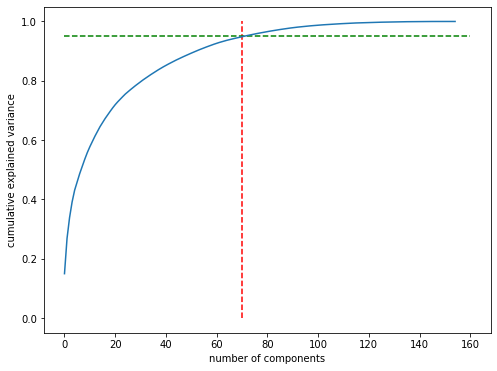

In [59]:
pca = PCA(random_state=42)
pca.fit(X_scaled_df)

fig = plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.show()

95% of the data available with 70 principal components

#### Train-Test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=42)

#### Handling class imbalance problem

In [61]:
y_train.value_counts()

0.0    19728
1.0     1278
Name: target, dtype: int64

In [62]:
# Using SMOTE to handle the class imbalance problem
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [63]:
y_train_sm.value_counts()

0.0    19728
1.0    19728
Name: target, dtype: int64

#### Selecting 70 componenents and building model

In [64]:
# Incremental PCA to select top 70 features
pca_incr = IncrementalPCA(n_components=70)

In [65]:
churn_data_pca_train = pca_incr.fit_transform(X_train_sm)
churn_data_pca_train.shape

(39456, 70)

In [66]:
# Correlation matrix of features
corrmat = np.corrcoef(churn_data_pca_train.transpose())

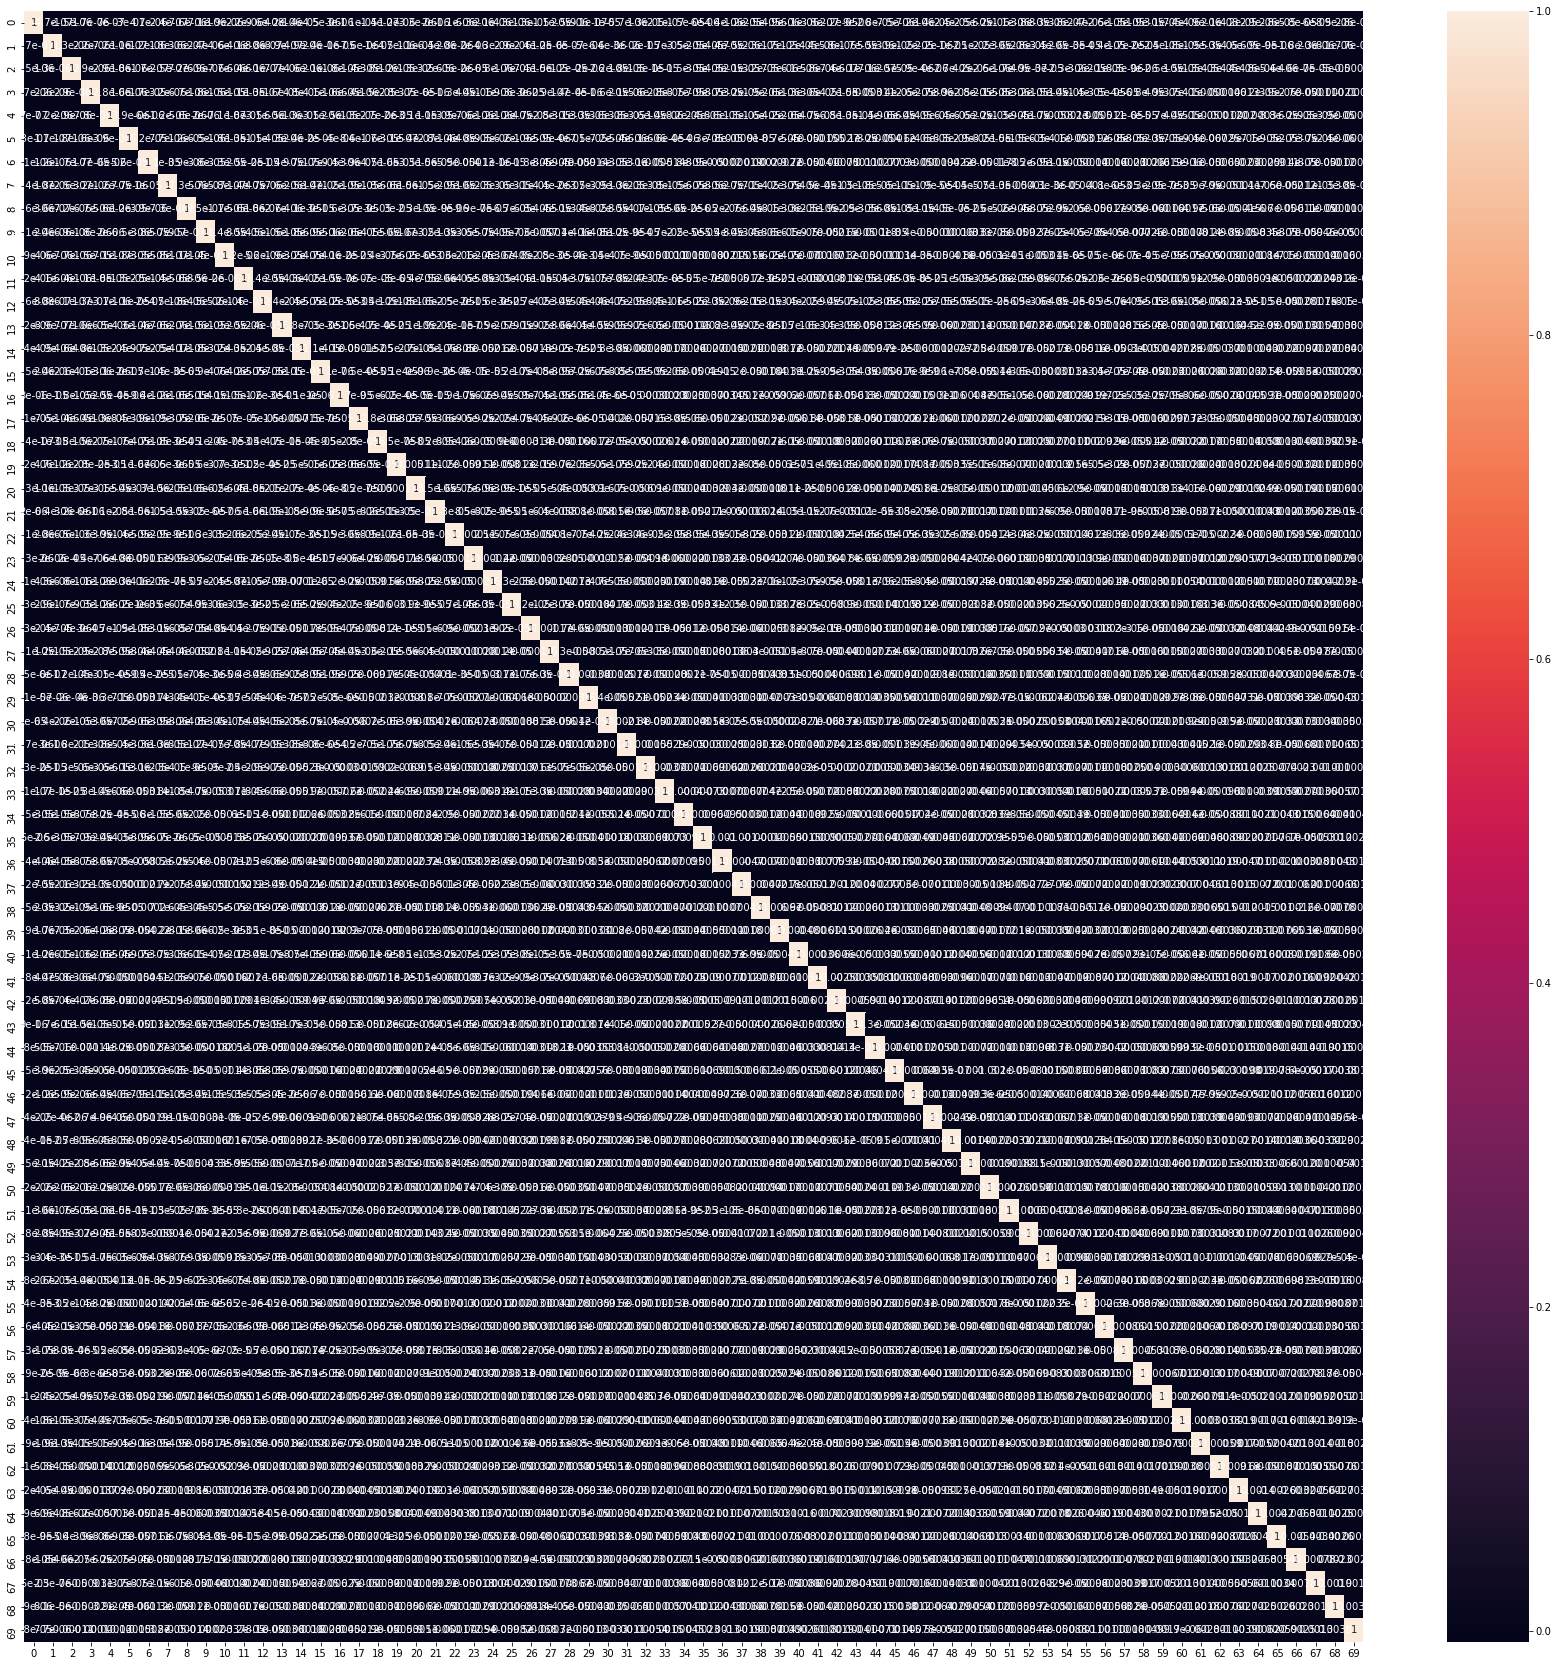

In [67]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)
plt.show()

From the color of the heat map it is evident that the data have no multicollinearity at all

### Logistic Regression

Applying logistic regression model to the data transformed using PCA

In [68]:
lr = LogisticRegression()

In [69]:
model_lr = lr.fit(churn_data_pca_train, y_train_sm)

In [70]:
churn_data_pca_test = pca_incr.transform(X_test)

In [71]:
churn_data_pca_test.shape

(9003, 70)

In [72]:
y_pred_test = model_lr.predict(churn_data_pca_test)

In [73]:
from sklearn import metrics
print("Train Accuracy :", accuracy_score(y_train_sm, model_lr.predict(churn_data_pca_train)))
print('-'*50)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Train Accuracy : 0.8632400648824007
--------------------------------------------------
Test Accuracy : 0.8609352438076197


In [74]:
# Confusion matrix for Logistic
LR_cm = confusion_matrix(y_test, model_lr.predict(churn_data_pca_test))
LR_cm

array([[7368, 1143],
       [ 109,  383]])

In [75]:
LR_prec = LR_cm[0][0]/(LR_cm[0][0]+LR_cm[1][0])
LR_rec = LR_cm[0][0]/(LR_cm[0][0]+LR_cm[0][1])
print("Precision: ", round(LR_prec,2), "\nRecall: ", round(LR_rec,2))

Precision:  0.99 
Recall:  0.87


### Random Forest

In [76]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [77]:
%%time
rf.fit(churn_data_pca_train, y_train_sm)

CPU times: user 1.12 s, sys: 13.5 ms, total: 1.14 s
Wall time: 634 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [78]:
rf.oob_score_

0.7438665855636658

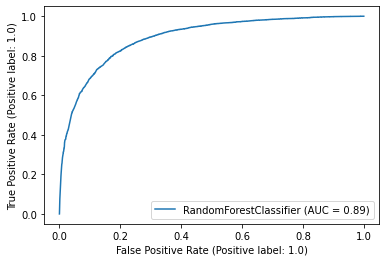

In [79]:
plot_roc_curve(rf,churn_data_pca_train, y_train_sm)
plt.show()

AUC score is 0.89, thus can be improved by hyper-paramters tuning

#### Hyper-parameter tuning for the Random Forest

In [80]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [81]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [82]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [83]:
%%time
grid_search.fit(churn_data_pca_train, y_train_sm)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 54.6 s, sys: 423 ms, total: 55 s
Wall time: 8min 34s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [84]:
grid_search.best_score_

0.9588655717761557

In [85]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

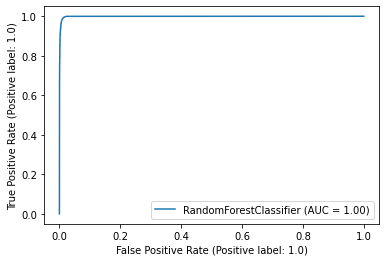

In [86]:
plot_roc_curve(rf_best, churn_data_pca_train, y_train_sm)
plt.show()

In [87]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_sm, dt_classifier.predict(churn_data_pca_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(churn_data_pca_test)))

In [88]:
evaluate_model(rf_best)

Train Accuracy : 0.989507299270073
--------------------------------------------------
Test Accuracy : 0.9322448072864601


In [90]:
# Confusion matrix for Random Forest classifier
RF_cm = confusion_matrix(y_test, rf_best.predict(churn_data_pca_test))
RF_cm

array([[8152,  359],
       [ 251,  241]])

In [91]:
RF_prec = RF_cm[0][0]/(RF_cm[0][0]+RF_cm[1][0])
RF_rec = RF_cm[0][0]/(RF_cm[0][0]+RF_cm[0][1])
print("Precision: ", round(RF_prec,2), "\nRecall: ", round(RF_rec,2))

Precision:  0.97 
Recall:  0.96


So with PCA, Train and Test accuracy have come out great, Let's try out XGboost on the data without PCA

### Applying XGBoost on data without PCA 

In [92]:
import xgboost as xgb

In [93]:
xgb_cf1 = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cf1.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [94]:
xgb_cf1.fit(X_train_sm, y_train_sm)
xgb_predictions = xgb_cf1.predict(X_test)

[19:06:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
print("Train Accuracy :", accuracy_score(y_train_sm, xgb_cf1.predict(X_train_sm)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, xgb_cf1.predict(X_test)))

Train Accuracy : 0.9996198296836983
--------------------------------------------------
Test Accuracy : 0.9557925136065756


In [96]:
# Confusion matrix for XGBoost classifier
XGB_cm = confusion_matrix(y_test, xgb_cf1.predict(X_test))
XGB_cm

array([[8357,  154],
       [ 244,  248]])

In [97]:
XGB_prec = XGB_cm[0][0]/(XGB_cm[0][0]+XGB_cm[1][0])
XGB_rec = XGB_cm[0][0]/(XGB_cm[0][0]+XGB_cm[0][1])
print("Precision: ", round(XGB_prec,2), "\nRecall: ", round(XGB_rec,2))

Precision:  0.97 
Recall:  0.98


Accuracy of the Data without PCA on XGBoost are pretty good

### Top 25 features selected by XGBoost model

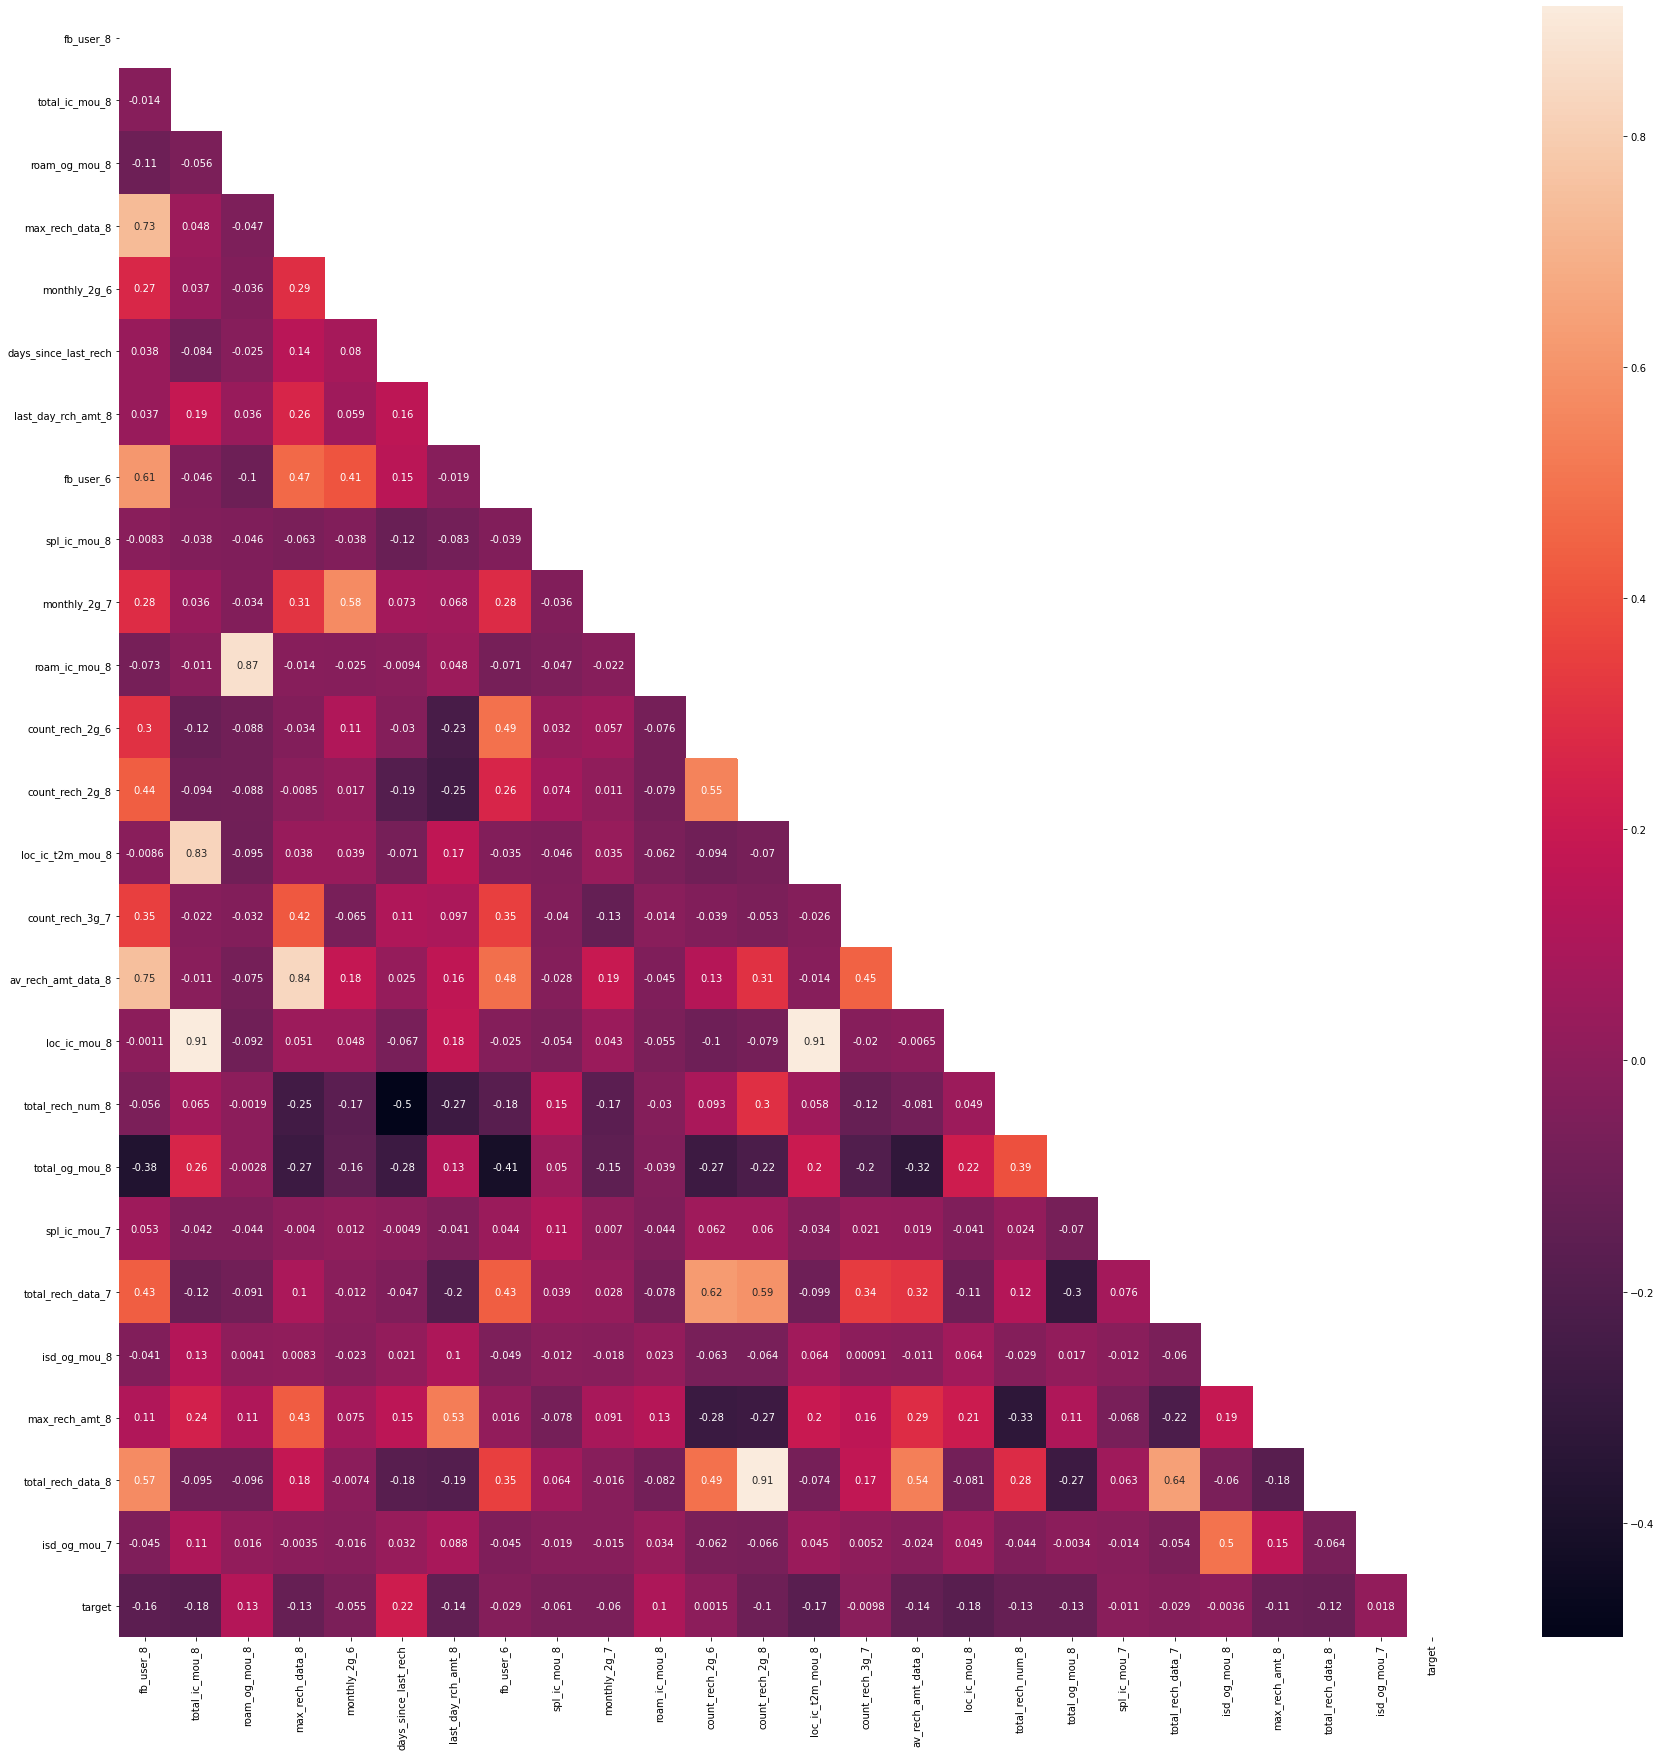

In [98]:
feature_imp_df = pd.DataFrame({"Feature":X_train_sm.columns, "Value":xgb_cf1.feature_importances_})
top_25_features = list(feature_imp_df.sort_values(by='Value', ascending=False).head(25)['Feature'])
top_25_features.append('target')
new_churn_data_HV['target'] = new_churn_data_HV['target'].astype('int64')

plt.figure(figsize=[30,30])
mask = np.triu(np.ones_like(new_churn_data_HV[top_25_features].corr()))
sns.heatmap(new_churn_data_HV[top_25_features].corr(), mask=mask, annot=True)
plt.show()

### Best Model Selection

In [102]:
models = pd.DataFrame({"Model":['Logistic Regression & PCA', 'Random Forest & PCA', 'XGBoost'], 
                       "Accuracy Train":[86.3, 98.9, 99.9], "Accuracy Test":[86.1, 93.2, 95.6],
                       "Precision":[LR_prec, RF_prec, XGB_prec], "Recall":[LR_rec, RF_rec, XGB_rec]
                      })
models

,Model,Accuracy Train,Accuracy Test,Precision,Recall
0,Logistic Regression & PCA,86.3,86.1,0.985422,0.865703
1,Random Forest & PCA,98.9,93.2,0.970130,0.957819
2,XGBoost,99.9,95.6,0.971631,0.981906


### Top 25 features affecting the churn are:

In [111]:
feature_imp_df.sort_values(by='Value', ascending=False).head(25)

,Feature,Value
146,fb_user_8,0.140584
80,total_ic_mou_8,0.127612
14,roam_og_mou_8,0.067186
107,max_rech_data_8,0.051756
132,monthly_2g_6,0.033735
154,days_since_last_rech,0.032274
101,last_day_rch_amt_8,0.019427
144,fb_user_6,0.017196
83,spl_ic_mou_8,0.015188
133,monthly_2g_7,0.013266


### Concluision


* Based on the above features we can say that Roaming charges are something company has to pay attention to, To avoid chustomers churning
* Also STD and ISD charges are also important features to look into for customer retention
* Moving forward internet/data charges will also affect the customer usability of the network, Thus in long run it is important to provide chaper data for customer retention and also new customer acquisition